In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as nm
import matplotlib.pyplot as mpt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
import seaborn as sns

In [3]:

#Loading the data
data0 = pd.read_csv('//content/drive/MyDrive/Phishing_website_detection/My_sets/urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [4]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [5]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [6]:

#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

In [7]:
#Check for the missing value
print(data0.isnull().sum())

Domain           0
Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64



**Interpretation:** <br>
Domain: 0 - There are 0 missing values in the 'Domain' column.<br>
Have_IP: 0 - There are 0 missing values in the 'Have_IP' column.<br>
Have_At: 0 - There are 0 missing values in the 'Have_At' column.<br>
URL_Length: 0 - There are 0 missing values in the 'URL_Length' column.<br>
URL_Depth: 0 - There are 0 missing values in the 'URL_Depth' column.<br>
Redirection: 0 - There are 0 missing values in the 'Redirection' column.<br>
https_Domain: 0 - There are 0 missing values in the 'https_Domain' column.<br>
TinyURL: 0 - There are 0 missing values in the 'TinyURL' column.<br>

**Summary:** <br>
This means that there are no missing values in any of the columns of your DataFrame. Your dataset is complete, and you can proceed with data analysis or model building without needing to handle missing data.

In [8]:
# Lets find how many malicious and non-malicious samples we have
# i = df["type"].value_counts()
# print(i)

# mpt.figure(figsize=(10,10))
# sns.countplot(x='type',data=df)
# mpt.title("Count Of URLs",fontsize=20)
# mpt.xlabel("Type Of URLs",fontsize=18)
# mpt.ylabel("Number Of URLs",fontsize=18)
# mpt.show()

In [9]:
data0['Domain'] = data0['Domain'].apply(lambda x: 1 if x == 'malicious_phish' else 0)


## **Visualizing the data**

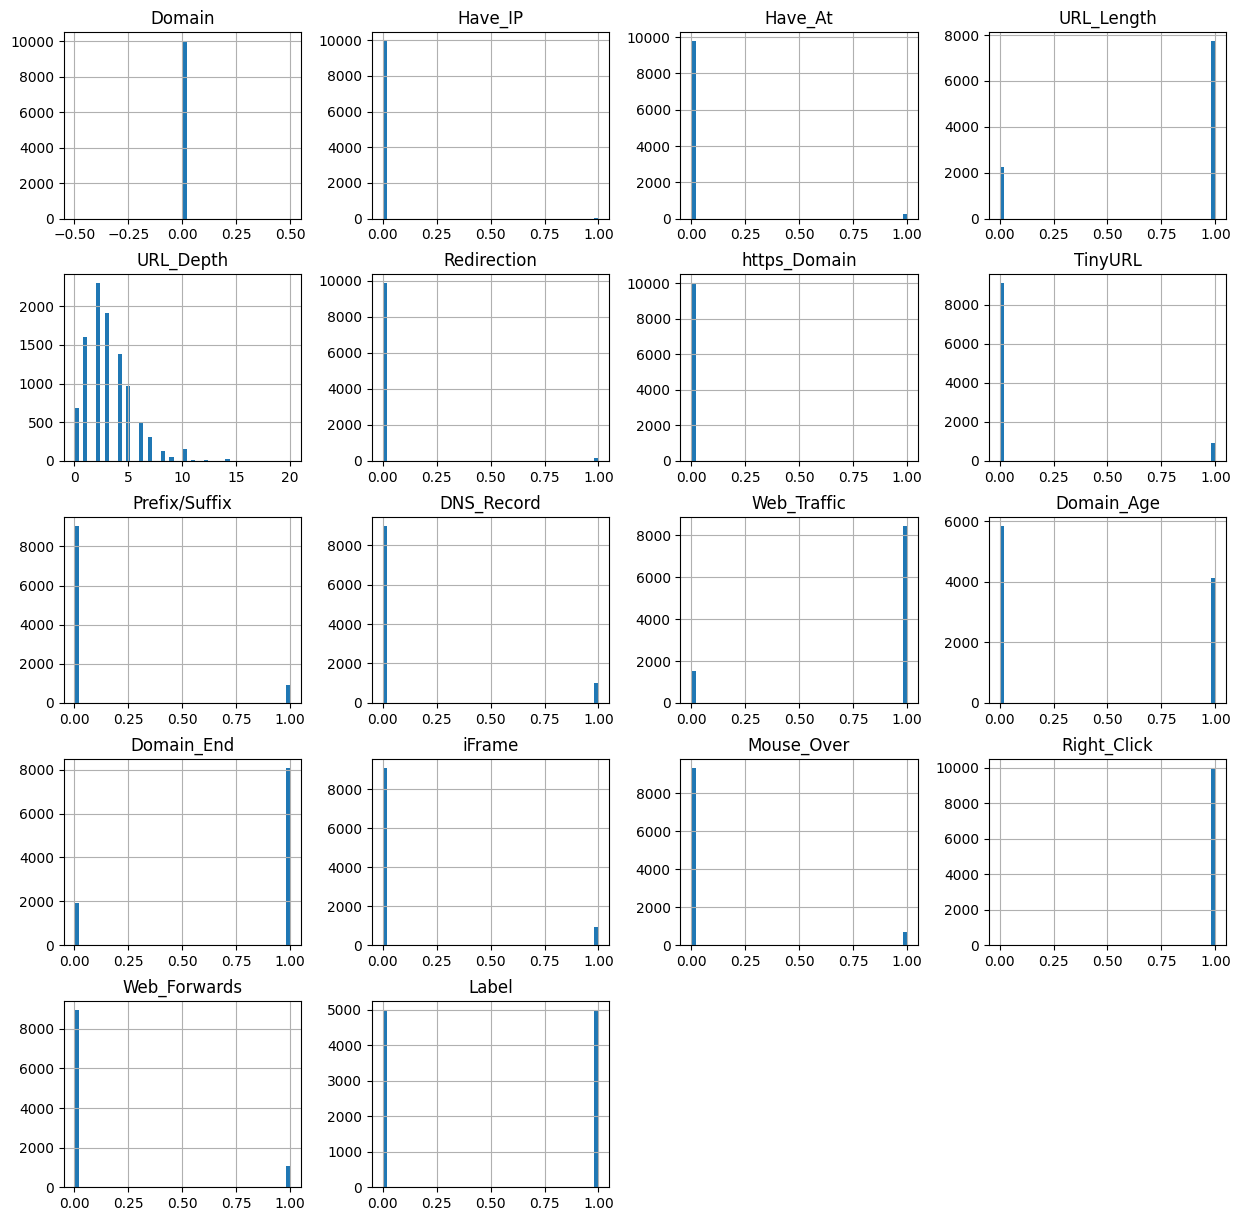

In [10]:

#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
mpt.show()

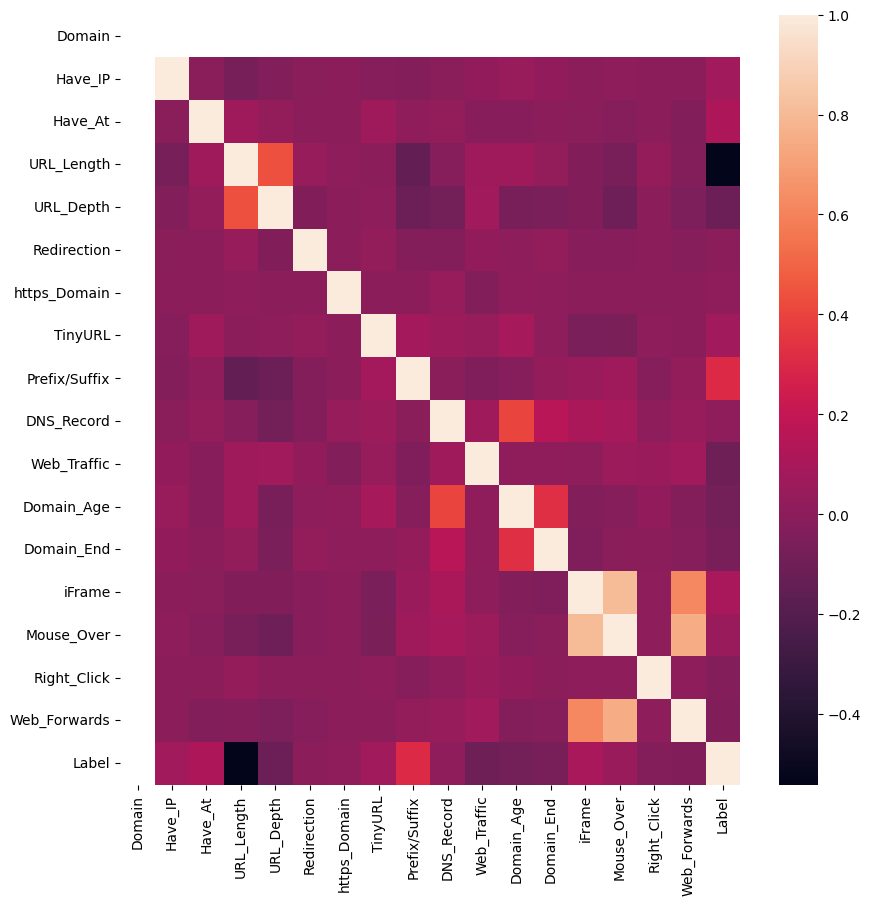

In [11]:

#Correlation heatmap

mpt.figure(figsize=(10,10))
sns.heatmap(data0.corr())
mpt.show()

In [12]:

data0.describe()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.0,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.0,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.0,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.0,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,0.0,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [13]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [14]:

#checking the data for null or missing values
data.isnull().sum()

,0
Have_IP,0
Have_At,0
URL_Length,0
URL_Depth,0
Redirection,0
https_Domain,0
TinyURL,0
Prefix/Suffix,0
DNS_Record,0
Web_Traffic,0


In [15]:

# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,3,0,0,0,0,0,1,0,0,0,0,1,0,1
1,0,0,0,2,0,0,0,1,0,1,0,1,0,0,1,0,1
2,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,0,1
3,0,0,1,3,0,0,0,0,1,1,1,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,1,1,1,1,0,0,1,0,0


In [16]:
# Drop rows with missing values (if any)
data.dropna(inplace=True)

In [17]:
print(data.head())

   Have_IP  Have_At  URL_Length  URL_Depth  Redirection  https_Domain  \
0        0        0           1          3            0             0   
1        0        0           0          2            0             0   
2        0        0           0          0            0             0   
3        0        0           1          3            0             0   
4        0        0           1          3            0             0   

   TinyURL  Prefix/Suffix  DNS_Record  Web_Traffic  Domain_Age  Domain_End  \
0        0              0           0            1           0           0   
1        0              1           0            1           0           1   
2        1              1           1            1           1           1   
3        0              0           1            1           1           1   
4        0              0           1            1           1           1   

   iFrame  Mouse_Over  Right_Click  Web_Forwards  Label  
0       0           0            1

In [18]:
print(data.tail())

      Have_IP  Have_At  URL_Length  URL_Depth  Redirection  https_Domain  \
9995        0        0           0          2            0             0   
9996        0        0           1          2            0             0   
9997        0        0           0          0            0             0   
9998        0        0           1          3            0             0   
9999        0        0           1          7            0             0   

      TinyURL  Prefix/Suffix  DNS_Record  Web_Traffic  Domain_Age  Domain_End  \
9995        0              0           0            1           0           1   
9996        0              1           0            0           0           0   
9997        0              1           1            1           1           1   
9998        0              0           0            0           1           1   
9999        0              0           0            1           0           1   

      iFrame  Mouse_Over  Right_Click  Web_Forwards  Lab

In [19]:
# Check for duplicates
print(data.duplicated().sum())

9120


In [20]:
# Drop duplicate rows (if any)
data.drop_duplicates(inplace=True)

## **Splitting the Data**

In [21]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((880, 16), (880,))

In [22]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((704, 16), (176, 16))

## **Machine Learning Models & Training**

In [23]:
#importing packages
from sklearn.metrics import accuracy_score

In [24]:

# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# **Decision Tree Classifier**

In [25]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [26]:

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [27]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.810
Decision Tree: Accuracy on test Data: 0.835


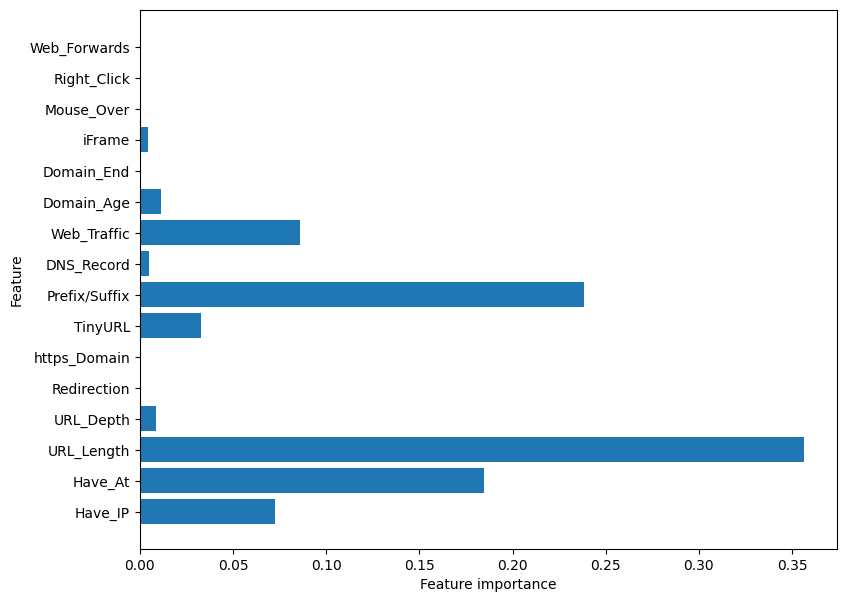

In [28]:
#checking the feature improtance in the model
mpt.figure(figsize=(9,7))
n_features = X_train.shape[1]
mpt.barh(range(n_features), tree.feature_importances_, align='center')
mpt.yticks(nm.arange(n_features), X_train.columns)
mpt.xlabel("Feature importance")
mpt.ylabel("Feature")
mpt.show()

In [31]:
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train the Decision Tree model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Save the model to a .pkl file
with open('/content/drive/MyDrive/Phishing_website_detection/Models/dt_model.pkl', 'wb') as file:
    pickle.dump(tree, file)

print("Model saved to dt_model.pkl")

# Load the model from the .pkl file (for future use)
with open('/content/drive/MyDrive/Phishing_website_detection/Models/dt_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Verify that the loaded model works
y_pred = loaded_model.predict(X_test)
print(f"Loaded model accuracy: {accuracy_score(y_test, y_pred)}")


Model saved to dt_model.pkl
Loaded model accuracy: 0.6931818181818182


In [32]:
import pickle
import numpy as np
import pandas as pd

# Load the model
with open('/content/drive/MyDrive/Phishing_website_detection/Models/dt_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Example input data (replace this with your actual input data)
# Ensure this matches the number of features the model expects
# Example feature names; replace these with your actual feature names
feature_names = ['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

# Example input data (replace this with your actual input data)
input_data = {
    'Have_IP': ['No'],                   # Replace with actual value ('Yes'/'No')
    'Have_At': ['No'],                   # Replace with actual value ('Yes'/'No')
    'URL_Length': [54],                  # Replace with actual value (integer)
    'URL_Depth': [2],                    # Replace with actual value (integer)
    'Redirection': ['No'],               # Replace with actual value ('Yes'/'No')
    'https_Domain': ['Yes'],             # Replace with actual value ('Yes'/'No')
    'TinyURL': ['No'],                   # Replace with actual value ('Yes'/'No')
    'Prefix/Suffix': [0],             # Replace with actual value ('Yes'/'No')
    'DNS_Record': [0],               # Replace with actual value ('Yes'/'No')
    'Web_Traffic': [1],                 # Replace with actual value (integer)
    'Domain_Age': [6],                   # Replace with actual value (integer)
    'Domain_End': [10],                  # Replace with actual value (integer)
    'iFrame': ['Yes'],                   # Replace with actual value ('Yes'/'No')
    'Mouse_Over': ['No'],                # Replace with actual value ('Yes'/'No')
    'Right_Click': ['No'],               # Replace with actual value ('Yes'/'No')
    'Web_Forwards': [1],                 # Replace with actual value (integer)
    'Label': [1]                    # Replace with actual value ('1')
}

# Convert to DataFrame
input_df = pd.DataFrame(input_data)

categorical_features = ['Have_IP', 'Have_At', 'Redirection', 'https_Domain', 'TinyURL', 'DNS_Record', 'iFrame', 'Mouse_Over', 'Right_Click']

# Use one-hot encoding on the categorical features
input_df = pd.get_dummies(input_df, columns=categorical_features)

# Ensure the DataFrame has the same columns as the model was trained with
# Create a DataFrame with all zeros and the correct columns
required_columns = [
    'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
    'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Domain_Age', 'Domain_End',
    'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards'
]

# Ensure categorical features are one-hot encoded the same way as during training
input_df = pd.get_dummies(input_df)

# Ensure the DataFrame has the same columns as the model was trained with
# Create a DataFrame with all zeros and the correct columns
#all_columns = model.get_booster().feature_names  # Adjust this if necessary
input_df = input_df.reindex(columns= required_columns, fill_value=0)

# Make prediction
prediction = model.predict(input_df)

# Print the result
print(f'Prediction: {prediction[0]}')


Prediction: 1


In [34]:
import pickle
import pandas as pd

# Load the model
with open('/content/drive/MyDrive/Phishing_website_detection/Models/dt_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Example feature names used in the model
feature_names = ['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
                 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

# Function to extract features from a given URL
def extract_features(url):
    # Replace this function with actual feature extraction logic
    # Here we are using dummy values for illustration purposes
    features = {
        'Have_IP': 0,                   # Replace with actual logic
        'Have_At': 0,                   # Replace with actual logic
        'URL_Length': len(url),            # Example logic: length of the URL
        'URL_Depth': url.count('/'),       # Example logic: count of '/' in the URL
        'Redirection': 0,               # Replace with actual logic
        'https_Domain': 1,             # Replace with actual logic
        'TinyURL': 0,                   # Replace with actual logic
        'Prefix/Suffix': 0,                # Replace with actual logic
        'DNS_Record': 1,                   # Replace with actual logic
        'Web_Traffic': 1000,               # Replace with actual logic
        'Domain_Age': 12,                  # Replace with actual logic
        'Domain_End': 24,                  # Replace with actual logic
        'iFrame': 1,                   # Replace with actual logic
        'Mouse_Over': 0,                # Replace with actual logic
        'Right_Click': 0,                # Replace with actual logic
        'Web_Forwards': 1                  # Replace with actual logic
    }
    return features

# Function to preprocess input data
def preprocess_input(data):
    # Convert to DataFrame
    input_df = pd.DataFrame([data])

    # One-hot encode categorical features
    categorical_features = ['Have_IP', 'Have_At', 'Redirection', 'https_Domain', 'TinyURL', 'iFrame', 'Mouse_Over', 'Right_Click']
    input_df = pd.get_dummies(input_df, columns=categorical_features)

    # Ensure the DataFrame has the same columns as the model was trained with
    required_columns = ['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
                 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

    # Reindex the DataFrame to match the model's training features, filling missing values with 0
    input_df = input_df.reindex(columns=required_columns, fill_value=0)

    return input_df

# Main function to take URL input and make prediction
def predict_url(url):
    # Extract features from the URL
    features = extract_features(url)

    # Preprocess input data
    processed_input = preprocess_input(features)

    # Make prediction
    prediction = model.predict(processed_input)
    result = "Phishing" if prediction[0] == 1 else "Legitimate"

    return result

# Example usage
if __name__ == "__main__":
    # Input URL from the user
    url = input("Enter URL: ")

    # Predict whether the URL is phishing or legitimate
    result = predict_url(url)

    # Print the result
    print(f'The URL is predicted to be: {result}')


Enter URL: appleid.apple.com-sa.pm
The URL is predicted to be: Phishing


# **Random Forest Classifier**

In [35]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier()

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [37]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.902
Random forest: Accuracy on test Data: 0.733


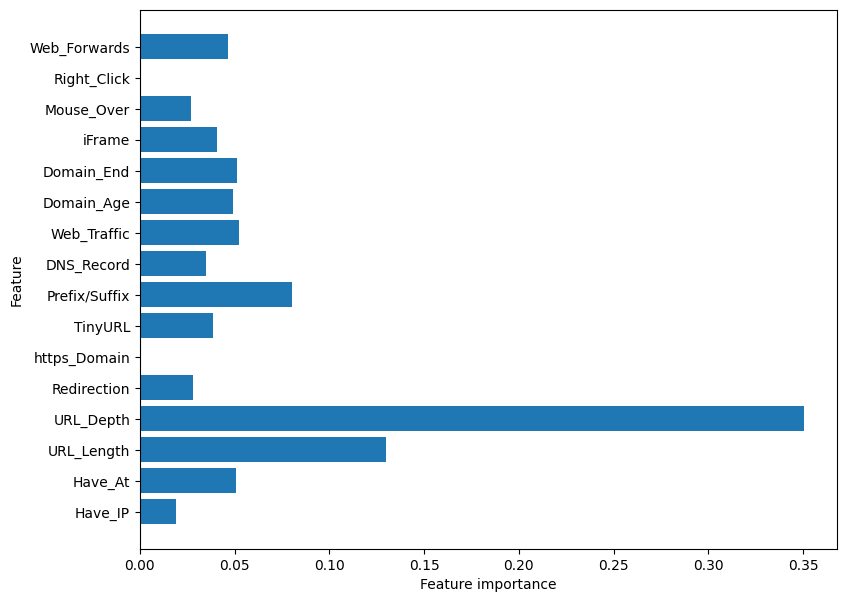

In [38]:
#checking the feature improtance in the model
mpt.figure(figsize=(9,7))
n_features = X_train.shape[1]
mpt.barh(range(n_features), forest.feature_importances_, align='center')
mpt.yticks(nm.arange(n_features), X_train.columns)
mpt.xlabel("Feature importance")
mpt.ylabel("Feature")
mpt.show()

In [41]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already trained your model
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

# Save the model to a .pkl file
with open('/content/drive/MyDrive/Phishing_website_detection/Models/random_forest_model.pkl', 'wb') as file:
    pickle.dump(forest, file)

print("Model saved to random_forest_model.pkl")

# Load the model from the .pkl file (for future use)
with open('/content/drive/MyDrive/Phishing_website_detection/Models/random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Verify that the loaded model works
y_pred = loaded_model.predict(X_test)
print(f"Loaded model accuracy: {accuracy_score(y_test, y_pred)}")


Model saved to random_forest_model.pkl
Loaded model accuracy: 0.7329545454545454


In [42]:
import pickle
import numpy as np
import pandas as pd

# Load the model
with open('/content/drive/MyDrive/Phishing_website_detection/Models/random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Example input data (replace this with your actual input data)
# Ensure this matches the number of features the model expects
# Example feature names; replace these with your actual feature names
feature_names = ['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

# Example input data (replace this with your actual input data)
input_data = {
    'Have_IP': ['No'],                   # Replace with actual value ('Yes'/'No')
    'Have_At': ['No'],                   # Replace with actual value ('Yes'/'No')
    'URL_Length': [54],                  # Replace with actual value (integer)
    'URL_Depth': [2],                    # Replace with actual value (integer)
    'Redirection': ['No'],               # Replace with actual value ('Yes'/'No')
    'https_Domain': ['Yes'],             # Replace with actual value ('Yes'/'No')
    'TinyURL': ['No'],                   # Replace with actual value ('Yes'/'No')
    'Prefix/Suffix': [0],             # Replace with actual value ('Yes'/'No')
    'DNS_Record': [0],               # Replace with actual value ('Yes'/'No')
    'Web_Traffic': [1],                 # Replace with actual value (integer)
    'Domain_Age': [6],                   # Replace with actual value (integer)
    'Domain_End': [10],                  # Replace with actual value (integer)
    'iFrame': ['Yes'],                   # Replace with actual value ('Yes'/'No')
    'Mouse_Over': ['No'],                # Replace with actual value ('Yes'/'No')
    'Right_Click': ['No'],               # Replace with actual value ('Yes'/'No')
    'Web_Forwards': [1],                 # Replace with actual value (integer)
    'Label': [1]                    # Replace with actual value ('1')
}

# Convert to DataFrame
input_df = pd.DataFrame(input_data)

categorical_features = ['Have_IP', 'Have_At', 'Redirection', 'https_Domain', 'TinyURL', 'DNS_Record', 'iFrame', 'Mouse_Over', 'Right_Click']

# Use one-hot encoding on the categorical features
input_df = pd.get_dummies(input_df, columns=categorical_features)

# Ensure the DataFrame has the same columns as the model was trained with
# Create a DataFrame with all zeros and the correct columns
required_columns = [
    'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
    'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Domain_Age', 'Domain_End',
    'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards'
]

# Ensure categorical features are one-hot encoded the same way as during training
input_df = pd.get_dummies(input_df)

# Ensure the DataFrame has the same columns as the model was trained with
# Create a DataFrame with all zeros and the correct columns
#all_columns = model.get_booster().feature_names  # Adjust this if necessary
input_df = input_df.reindex(columns= required_columns, fill_value=0)

# Make prediction
prediction = model.predict(input_df)

# Print the result
print(f'Prediction: {prediction[0]}')


Prediction: 1


In [ ]:
import pickle
import pandas as pd

# Load the model
with open('/content/drive/MyDrive/Phishing_website_detection/Models/random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Example feature names used in the model
feature_names = ['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
                 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

# Function to extract features from a given URL
def extract_features(url):
    # Replace this function with actual feature extraction logic
    # Here we are using dummy values for illustration purposes
    features = {
        'Have_IP': 0,                   # Replace with actual logic
        'Have_At': 0,                   # Replace with actual logic
        'URL_Length': len(url),            # Example logic: length of the URL
        'URL_Depth': url.count('/'),       # Example logic: count of '/' in the URL
        'Redirection': 0,               # Replace with actual logic
        'https_Domain': 1,             # Replace with actual logic
        'TinyURL': 0,                   # Replace with actual logic
        'Prefix/Suffix': 0,                # Replace with actual logic
        'DNS_Record': 1,                   # Replace with actual logic
        'Web_Traffic': 1000,               # Replace with actual logic
        'Domain_Age': 12,                  # Replace with actual logic
        'Domain_End': 24,                  # Replace with actual logic
        'iFrame': 1,                   # Replace with actual logic
        'Mouse_Over': 0,                # Replace with actual logic
        'Right_Click': 0,                # Replace with actual logic
        'Web_Forwards': 1                  # Replace with actual logic
    }
    return features

# Function to preprocess input data
def preprocess_input(data):
    # Convert to DataFrame
    input_df = pd.DataFrame([data])

    # One-hot encode categorical features
    categorical_features = ['Have_IP', 'Have_At', 'Redirection', 'https_Domain', 'TinyURL', 'iFrame', 'Mouse_Over', 'Right_Click']
    input_df = pd.get_dummies(input_df, columns=categorical_features)

    # Ensure the DataFrame has the same columns as the model was trained with
    required_columns = ['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
                 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

    # Reindex the DataFrame to match the model's training features, filling missing values with 0
    input_df = input_df.reindex(columns=required_columns, fill_value=0)

    return input_df

# Main function to take URL input and make prediction
def predict_url(url):
    # Extract features from the URL
    features = extract_features(url)

    # Preprocess input data
    processed_input = preprocess_input(features)

    # Make prediction
    prediction = model.predict(processed_input)
    result = "Phishing" if prediction[0] == 1 else "Legitimate"

    return result

# Example usage
if __name__ == "__main__":
    # Input URL from the user
    url = input("Enter URL: ")

    # Predict whether the URL is phishing or legitimate
    result = predict_url(url)

    # Print the result
    print(f'The URL is predicted to be: {result}')
